# COMP8260 In-Class Assessment 1

Time: 1h 30m

During the assessment you can access lecture slides and the following documentation pages:

* https://scikit-learn.org/stable/modules/classes.html
* https://pandas.pydata.org/docs/user_guide/index.html
* https://numpy.org/doc/stable/user/index.html
* https://matplotlib.org/stable/tutorials/introductory/pyplot.html

From your PC, you cannot access code you or others have developed previously including solutions to previous classes. You cannot access any other external resource beyond the pages linked above.

Save your notebook soon and frequently. In case the notebook crashes reloading the page will retrieve your last saved version, so if you have pending changes save the notebook before reloading.

Before the end of the class upload your notebook to the moodle submission area (you can download it from the jupyter server using the `File/Download` command).

### Before starting enter your name and login below:

* Name: Napatchol Thaipanich
* Login: nt375

## Q1

Load the “SpeedDating” (version 1) dataset using fetch_openml. Extract the categoical features from the data into `X_cat` and split it and the target feature into a train and a test set. Print the percentage of the positive and negative classes.
<p style='text-align: right;'>[4 marks]</p>

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the "SpeedDating" dataset
speed_dating = fetch_openml(name="SpeedDating", version=1, as_frame=True, parser='auto')
data = speed_dating.data
target = speed_dating.target.astype(int)  # Convert target to integer

# Extract categorical features
categorical_features = data.select_dtypes(include=['category', 'object'])
X_cat = pd.get_dummies(categorical_features)  # Convert categorical to numerical

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_cat, target, test_size=0.2, random_state=42)

# Calculate class distribution
positive_class_percentage = (y_train.sum() / len(y_train)) * 100
negative_class_percentage = 100 - positive_class_percentage

print(f"Positive class: {positive_class_percentage:.2f}%")
print(f"Negative class: {negative_class_percentage:.2f}%")


Positive class: 16.31%
Negative class: 83.69%


## Q2

Use a `OneHotEncoder` to encode the categorical attributes.
<p style='text-align: right;'>[4 marks]</p>

In [2]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_train_cat  = X_train[categorical_features]
X_test_cat = X_test[categorical_features]


X_train_enc = encoder.fit_transform(X_train_cat)
X_test_enc = encoder.fit_transform(X_test_cat)

print(X_train_enc.shape, X_test_enc.shape)

(6702, 441) (1676, 441)


## Q3

Train a DecisionTreeClassifier on `X_train_enc`. Print out the accuracy, precision and recall of the classifier using `sklearn.metrics.classification_report`. How good is the classifier in terms of these three metrics compared to a classifier that would always predict the majority class?
<p style='text-align: right;'>[4 marks]</p>

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dt_clf = DecisionTreeClassifier()


dt_clf.fit(X_train_enc, y_train)

y_pred = dt_clf.predict(X_test_enc)

#print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1389
           1       0.00      0.00      0.00       287

    accuracy                           0.83      1676
   macro avg       0.41      0.50      0.45      1676
weighted avg       0.69      0.83      0.75      1676



/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

## Q4

Train an AdaBoostClassifier using a DecisionTreeClassifier as base learner. Plot the ensemble training and testing accuracy as the base classifier max_depth varies between 1 and 5.

<p style='text-align: right;'>[4 marks]</p>

/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. U

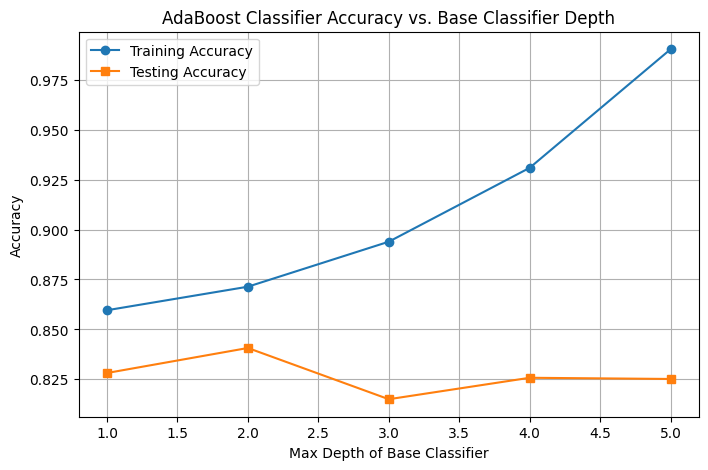

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

max_depth_values = range(1, 6)
train_accuracies = []
test_accuracies = []

for max_depth in max_depth_values:
    base_clf = DecisionTreeClassifier(max_depth=max_depth)
    ada_clf = AdaBoostClassifier(estimator=base_clf, n_estimators=50, random_state=42)
    ada_clf.fit(X_train, y_train)

    train_accuracy = ada_clf.score(X_train, y_train)
    test_accuracy = ada_clf.score(X_test, y_test)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot training and testing accuracy
plt.figure(figsize=(8, 5))
plt.plot(max_depth_values, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(max_depth_values, test_accuracies, marker='s', label='Testing Accuracy')
plt.xlabel("Max Depth of Base Classifier")
plt.ylabel("Accuracy")
plt.title("AdaBoost Classifier Accuracy vs. Base Classifier Depth")
plt.legend()
plt.grid()
plt.show()

## Q5

Define a pipeline that can handle both missing numerical values and categorical encoding using a ColumnTransformer followed by the best classifier you have found so far, compute its testing accuracy to see if the inclusion of the categorical attributes improves the accuracy.

<p style='text-align: right;'>[4 marks]</p>

In [6]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier  # Import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Load data (assuming 'data' is predefined)
# Extract categorical and numerical features
categorical_features = data.select_dtypes(include=['category', 'object']).columns
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Ensure the columns exist in X_train
missing_categorical = [col for col in categorical_features if col not in X_train.columns]
missing_numerical = [col for col in numerical_features if col not in X_train.columns]

if missing_categorical or missing_numerical:
    print("Warning! Some selected columns are missing:")
    print("Missing categorical:", missing_categorical)
    print("Missing numerical:", missing_numerical)

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# Define ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="drop"
)

# Define the model
best_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=50, random_state=42)

# Create the full pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", best_clf)
])

# Fit and evaluate the model
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))


/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1389
           1       0.53      0.45      0.49       287

    accuracy                           0.84      1676
   macro avg       0.71      0.68      0.69      1676
weighted avg       0.83      0.84      0.83      1676

